## 진도 피드백에 관하여

1. 매일 작성할 코드를 미리 나눠드리고, 코드작성을 따라오시다가 막히시는 부분들이 있다면 복사+붙여넣기 할 수 있도록 하겠습니다.
2. 마지막 4교시는 오늘 강의를 처음부터 다시 재학습하는 과정을 진행하겠습니다.

#### 끝으로, 강의 관련 피드백은 언제나 환영입니다. 

#### 피드백 주신 분 감사합니다.

# Transfer learning과 Fine Tuning

<br/>
<br/>

## Transfer learning (전이 학습)

> 기존의 데이터를 통해 구현한 문제 해결 방식들을 연관성이 존재하는 다른 문제에 적용할 수 있도록 하는 머신러닝의 한 방법

예를 들어, 라쿤을 구별하는 모델을 들고와서 너구리를 구별하는 모델로 사용할 수 있다. 이 때, 라쿤과 너구리 데이터는 공통적인 '특징'이 있기 때문이다.

CNN은 데이터들 간의 공통적인 '특징'을 기억하고, 해당 특징을 통해 분류하는 모델이라고 설명했다.

일반적으로 모델이 크면 클수록 학습하는데 필요한 데이터셋의 크기 또한 커지게 된다. (그 많은 파라미터를 학습시키려면..) 또한 더 복잡한 문제일수록 모델이 커질 수 밖에 없고 이에 따른 필요한 데이터셋의 크기 상승은 필수적이게 된다.

### 전이 학습의 과정

1. 기존의 유사한 문제를 해결하는 (현재 우리가 사용하는 데이터 셋과 유사한 데이터 셋을 학습시킨) 모델에서 Layer들을 들고온다.
 
    - 이 때, Convolution Layer들은 데이터의 '특징'들을 검출하는 레이어라고 하였다.(Convolution Layer의 연산 결과를 feature map이라고 하는 이유를 생각해보자.) 기존 데이터셋으로 학습되어있으므로 해당 데이터셋의 '특징'들을 담고 있을 것이다. 유사한 특징을 가지고 있는 현재 데이터셋에 사용하기 위해서 Convolution 연산을 수행하는 레이어들을 그대로 사용한다.
    

2. 기존의 모델에서 들고온 Layer들에 대해 `trainable = False`로 설정하여 학습 과정에서 가중치 갱신이 발생하지 않도록 한다.


3. 기존 모델의 Convolution Layer들을 통해 데이터의 '특징'들을 검출하는 과정만을 들고왔다. 해당 특징들을 통해서 (너구리이다/아니다.)와 같은 '분류'를 위한 예측을 수행해야하기 때문에 예측을 수행하는 새 레이어를 추가한다. 예측을 수행하는 레이어는 Fully connected layer로 구현한다.

    - 이전 과정에서 CNN을 구현할 때에도 Convolution 연산을 수행하는 레이어들을 거친 뒤, Flatten -> Fully connected layer를 통해 분류 예측을 실시하였다. 해당 레이어들을 통해 특징들을 종합하여 최종적인 분류 예측을 수행한다.


4. 데이터 셋을 통해 Fully connected layer로 구성된 예측을 수행하는 레이어들을 학습시킵니다.

<br/>
<br/>
<br/>

## Fine Tuning

전이학습을 진행하면, 우리가 새로 만든 예측을 수행하는 레이어가 충분히 학습되어있다. 이 때, '특징' 검출을 위해 사용했던 기존에 학습된 Convolution Layer에 대해서 현재 학습을 진행하는 데이터의 '특징'들을 반영하고자 한다. 기존의 데이터들로 기억된 '특징'을 사용하기만 하는 것이 아니라 현재 데이터의 '특징'들까지 기억할 수 있도록하는, 기존의 전이 학습 모델을 우리가 해결하고자 하는 문제에 대해서 조금 더 고도화하는 작업이라고 볼 수 있다.

- 기존에 학습을 진행하지 않았던 Convolution Layer 또한 학습을 진행시킨다.


- 기존의 learning_rate보다 훨씬 작은 learning_rate을 사용함으로써 기존의 학습된 가중치를 미세하게 보정한다. 기존의 학습된 '특징'들은 그대로 사용하되, 현재 데이터의 '특징'을 반영하기 위해서이다.


- `BatchNormalization`이 모델 내부에서 사용되는 경우, 반드시, `training=False`을 명시한다.

# 필요한 레이어 지식


## GlobalAveragePooling2D layer


```python

tf.keras.layers.GlobalAveragePooling2D(data_format=None, **kwargs)

```

---

채널별로 평균값을 사용하여 하나의 배열로 만드는 pooling과정

- 마지막 flatten()의 과정을 대신하여 fully-connected layer로 사용되기 위한 벡터화 과정을 해당 과정으로 대체한다.


# BatchNormalization



```python

tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    renorm=False,
    renorm_clipping=None,
    renorm_momentum=0.99,
    fused=None,
    trainable=True,
    virtual_batch_size=None,
    adjustment=None,
    name=None,
    **kwargs
)

```

---


### layer의 input을 정규화하는 과정.  


1. input이 동일한 분포를 가지지 못하는 이유는 학습 과정에서 가중치가 변경되고 변경된 가중치에 의해 입력의 분포가 바뀌게 되기 때문이다.
2. 단순히 input에 대한 정규화를 입력 전에 수행한다고 한다면 일단 정규화라는 연산이 매우 높은 cost를 가진 연산이다.
3. 또한 학습과정과 무관하게 진행되기 때문에 우리의 의도와는 다르게 학습이 진행될 수 있다. (특정 파라미터가 계속 커진다거나..)

그래서 이 과정을 batch마다 수행하며, 학습되는 과정과 동일하게 정규화하는 변수들도 학습하게 하여 정규화되는 것 또한 학습 과정에 맞도록 설계

- 위치는 activation function의 이전에 사용하는 것이 효율적이라는 것이 해당 논문에 나온다.


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
AUTOTUNE = tf.data.experimental.AUTOTUNE

import PIL
import os
import matplotlib.pyplot as plt

In [2]:
# GPU 사용하시는 분들은 반드시 작성
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# VGG 16, VGG 19


```python

tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

```

#### include_top

모델의 맨 위의 fully-connected layers를 포함시킬 것인가에 대한 정의한다. 


#### weights

기존에 학습된 가중치 값을 반영할 것인가에 대한 정의

- 'None'

    랜덤으로 내부 레이어들의 가중치를 초기화 한다.


- 'imagenet'

    ImageNet의 데이터셋을 사용하여 학습한 가중치를 사용한다.



#### input_shape

- include_top = False 일 때, 해당 인자를 사용할 수 있다.

input의 shape를 정의한다. `include_top = True`일 때는 input shape가 (224, 224, 3)으로 고정되어있다.



#### input_tensor

- include_top = False 일 때, 해당 인자를 사용할 수 있다.

Functional API를 통해 모델을 구현할 때 사용하였던 layers.Input()을 통해 입력 텐서를 정의할 수 있따.



#### pooling

- include_top = False 일 때, 해당 인자를 사용할 수 있다.

global pooling의 작업을 수행할 때, 풀링 방식을 정의한다.



#### classes

- weights = 'imagenet'일 때는 1000개의 카테고리가 고정되어있으므로 사용이 불가능하다.

- 모델의 모든 레이어 가중치를 초기화하여 해당 모델의 구조만 사용하고 싶을 때



---


   

## ImageNet

ImageNet은 1000개의 카테고리로 구성된 사물들을 구분할 수 있도록 1400만개 이상의 라벨링된 이미지 데이터셋을 말한다. 

매년 해당 데이터 셋을 학습시켜 정확도를 높이는 대회가 개최되는데, 대회에서 높은 순위의 모델을 미리 케라스에서 구현하여 제공한다.

- VGG16 / VGG19

    구조가 간단한 모델로 인간의 분류 능력과 거의 유사한 성능을 보인다.



- ResNet50 / ResNet101 / ResNet152

    Skip connection이라는 특별한 모델 구조를 사용하여 모델의 복잡도를 낮춤 
    
    레이어의 수가 많아져서 그 모델의 깊이가 깊어질수록 역전파를 통한 학습 과정에서 갱신되는 가중치의 변화량(미분을 통해서 구하였었다.)이 줄어드는 'Vanishing gradient problem'이 발생한다. 이러한 문제는 학습이 더 이상 진행되지 않게 되면서 모델 내의 레이어 수를 일정 크기 이상 증가시킬 수 없도록 하는 문제가 있었다. 즉, 반드시 레이어의 수를 증가시키는 것이 좋은 것은 아니었다. 이 때, Skip connection을 통해 가중치의 변화량을 레이어를 생략하여 전달함으로써 가중치의 변화량이 소실되는 문제를 피할 수 있었다.

    인간의 분류 능력을 넘어선 성능을 보인다.

# 전이학습을 진행할 모델 준비하기

In [3]:
from tensorflow.keras.applications import VGG16

vgg_small_model = VGG16()

In [4]:
# 가중치의 갯수가 1억 3천 8백만개정도
vgg_small_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(
    include_top = False,
    pooling = 'max'
)

In [6]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [3]:
from tensorflow.keras.applications import VGG19

vgg_big_model = VGG19()

In [4]:
# 가중치의 갯수가 1억 4천 3백만개정도
vgg_big_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# ResNet50, ResNet101

```python

tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    **kwargs
)


tf.keras.applications.ResNet101(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    **kwargs
)

```

위의 인자설명과 동일합니다.

In [91]:
from tensorflow.keras.applications import ResNet50, ResNet101

In [92]:
resnet_small_model = ResNet50()
resnet_big_model = ResNet101()

179650560/179648224 [==============================] - 14s 0us/step


In [97]:
# 4천 4백만개 하지만 레이어의 수가..??
resnet_big_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

# 데이터 준비하기

In [14]:
# 총 이미지의 갯수는 12500개씩 batch size를 지정하지 않으면 None으로 뜬다..
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/pets/',
#     label_mode = 'categorical',
    label_mode = 'binary',
    batch_size = 50,
)

train_dataset

Found 23422 files belonging to 2 classes.


<BatchDataset shapes: ((None, 256, 256, 3), (None, 1)), types: (tf.float32, tf.float32)>

In [23]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/pets/',
    # target size는 반대로다.
    seed = 6309,
    validation_split = 0.2,
    subset = 'training',
    label_mode = 'binary',
    
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/pets/',
    seed = 6309,
    validation_split = 0.2,
    subset = 'validation',
    label_mode = 'binary',
    
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


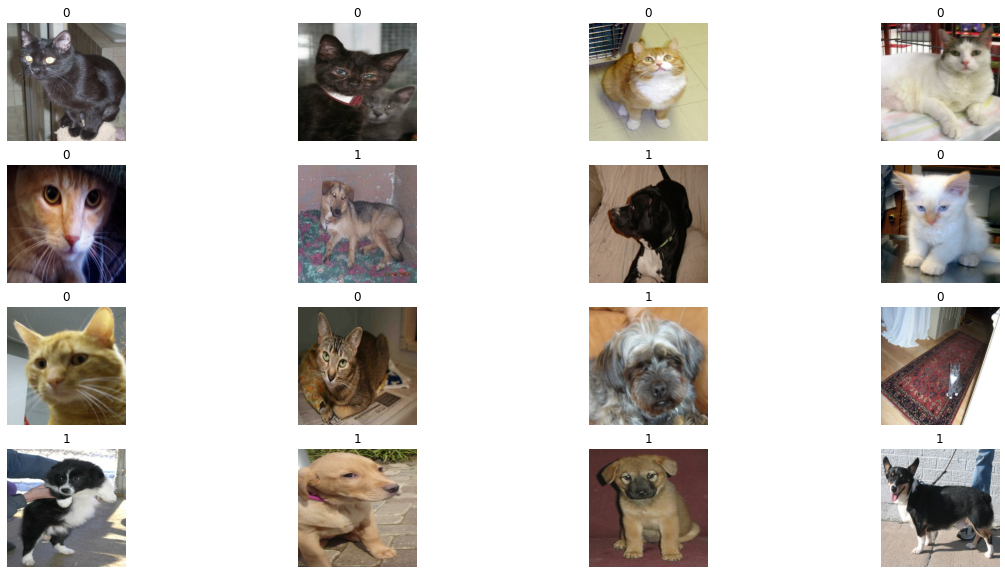

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train_dataset.take(9):
    for i, image in enumerate(images):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image / 255.)
        plt.title(int(labels[i]))
        plt.axis("off")
        if i == 15:
            break
    break

# Data augmentation 사용하기 - 1 레이어로 정의하기

In [36]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        # 360도의 10퍼센트 
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

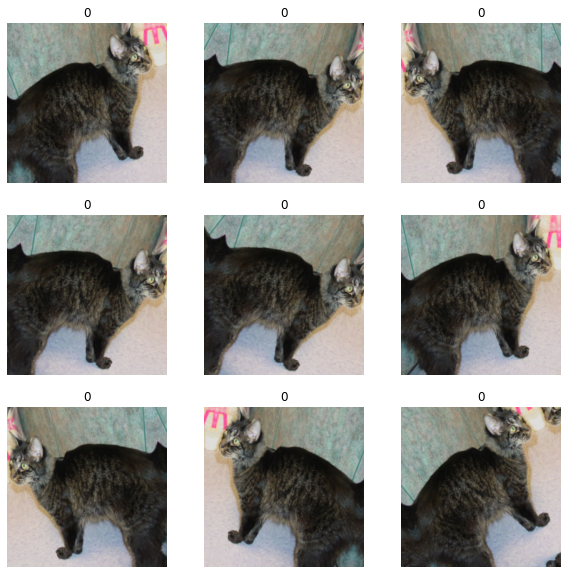

In [55]:
import numpy as np

global first_image

for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy() / 255.)
        plt.title(int(labels[0]))
        plt.axis("off")

# Data augmentation 사용하기 - 2 ImageDataGenerator로 정의하기

In [41]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [71]:
datagen = ImageDataGenerator(
    rotation_range = 36,
    horizontal_flip = True,
    validation_split = 0.2,
    #rescale=1./255
)    

In [60]:
# 테스트할 이미지를 구축한다.
img = load_img('./dataset/pets/Cat/10445.jpg')
data = img_to_array(img)
samples = np.expand_dims(data, 0)

In [64]:
# 이전 방법으로 사용하였던 이미지
tests = np.expand_dims(first_image.numpy(), 0)

(256, 256, 3)

<class 'numpy.ndarray'>


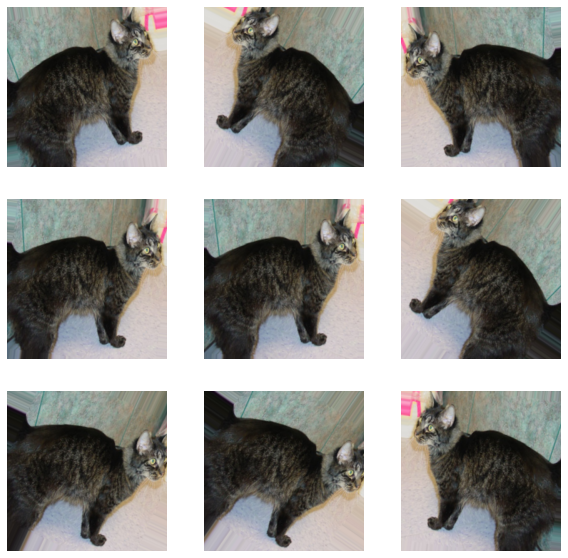

In [68]:
it = datagen.flow(tests, batch_size = 1)

# nd.array로 사용할 수 있게 된다.
batch = it.next()
print(type(batch))


fig = plt.figure(figsize = (10, 10))

for i in range(9):
        #들어오는 그래프를 서브플롯중 어디에 위치하게할 것인가를 결정
        plt.subplot(3,3, i + 1)

        # nd.array로 사용할 수 있게 된다.
        batch = it.next()

        image = batch[0].astype('uint8')
        plt.imshow(image)
        plt.axis("off")

## flow_from_directory

- label_mode -> class_mode

- image_size -> target_size

- validation_split -> ImageDataGenerator에 정의한다.

In [86]:
train_gen_dataset = datagen.flow_from_directory(
    './dataset/pets/',
    seed = 6309,
    subset = 'training',
    class_mode = 'binary',
    target_size = (150, 150)
)

val_gen_dataset = datagen.flow_from_directory(
    './dataset/pets/',
    seed = 6309,
    subset = 'validation',
    class_mode = 'binary',
    target_size = (150, 150)
)

Found 18739 images belonging to 2 classes.
Found 4683 images belonging to 2 classes.


# 모델 구현하기

In [80]:
from tensorflow.keras.layers import Dense, ReLU, BatchNormalization

In [81]:
base_model.trainable = False

In [95]:
inputs = tf.keras.Input(shape=(150, 150, 3))

# 해당 모델은 학습에 사용하지 않겠다를 명시한다. 
x = base_model(inputs, training=False)
x =  Dense(32)(x)
x =  BatchNormalization()(x)
x =  ReLU()(x)
outputs = Dense(1, activation = 'sigmoid')(x)

func_model = tf.keras.Model(inputs, outputs)

# 레이어로 구현한 Data Augmentation 적용

In [94]:
inputs = tf.keras.Input(shape=(150, 150, 3))

# 전처리 레이어 추가
x = data_augmentation(inputs)
# 해당 모델은 학습에 사용하지 않겠다를 명시한다. 
x = base_model(inputs, training=False)

x =  Dense(32)(x)
x =  BatchNormalization()(x)
x =  ReLU()(x)
outputs = Dense(1, activation = 'sigmoid')(x)

func_model = tf.keras.Model(inputs, outputs)

In [96]:
func_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_14 (Dense)             (None, 32)                16416     
_________________________________________________________________
batch_normalization_7 (Batch (None, 32)                128       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 14,731,265
Trainable params: 16,513
Non-trainable params: 14,714,752
__________________________________________

# 모델 학습하기

In [88]:
# 학습 루프 정의 
func_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [89]:
func_model.fit(train_gen_dataset, epochs=5)

Epoch 1/5
586/586 [==============================] - 352s 561ms/step - loss: 0.2912 - accuracy: 0.8718
Epoch 2/5
586/586 [==============================] - 313s 534ms/step - loss: 0.1798 - accuracy: 0.9248
Epoch 3/5
 46/586 [=>............................] - ETA: 4:48 - loss: 0.2016 - accuracy: 0.9203

KeyboardInterrupt: 

In [98]:
func_model.evaluate(val_gen_dataset)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

# fine tuning 하기

In [ ]:
base_model.trainable = True

In [9]:
func_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'],
)

In [10]:
func_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 32)                16416     
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 14,731,298
Trainable params: 14,731,234
Non-trainable params: 64
_________________________________________________________________


In [12]:
func_model.fit(train_dataset, epochs=5)

Epoch 1/5
171/469 [=========>....................] - ETA: 2:50 - loss: 0.6803 - accuracy: 0.5933

KeyboardInterrupt: 